In [ ]:
cd /content/drive/MyDrive/Google Colab/Md. Mahmudul Hasan Shahin Shahin | Infolytx AI ML Trainee Program/Natural Language Processing

/content/drive/MyDrive/Google Colab/Infolytx/Natural Language Processing


In [ ]:
https://www.kaggle.com/uciml/sms-spam-collection-dataset#spam.csv

# 🔗 Import Libraries.

In [ ]:
import nltk 
from nltk.corpus import stopwords 
from nltk import *
nltk.download('stopwords')
from nltk.corpus import stopwords

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from nltk.stem import WordNetLemmatizer 

import matplotlib.pyplot as plt
import sys, os, re, csv, codecs, numpy as np, pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 🔗 Import Keras Libraries.

In [ ]:
from keras.models import Model 
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
from keras.utils import to_categorical
from keras.layers import Dense, Input, Embedding, Dropout, Activation, MaxPooling1D, Embedding , Flatten, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN, LSTM
from keras.layers.recurrent import SimpleRNN
from keras import initializers, regularizers, constraints, optimizers, layers

# 💉 Import Data set.

In [ ]:
file_content = pd.read_csv('Data/spam.csv', encoding = "ISO-8859-1")

In [ ]:
file_content.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 📑 Data Preprocessing / Feature Engineering.

## 1) Removing Stop Word.

In [ ]:
#stop = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
file_content['v2'] = file_content['v2'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords)) 

## 2) Delete unwanted columns and rename.

In [ ]:
Email_Data = file_content[['v1', 'v2']]
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"}) 
Email_Data.head()

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


## 3) Apply Regex.
    * Remove Punctuation.
    * Convert Text into lowercase.
    * Delete double space.


In [ ]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub('[!@#$:).;,?&]','', x.lower()))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub(' ', ' ', x)) 
Email_Data['Email'].head(5)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: Email, dtype: object

# 🔪 Train Test split.
    * Separating input data and output classes.
    * 80% of total data goes into Train.
    * 20% goes into Test.

In [ ]:
list_sentences_rawdata = Email_Data["Email"].fillna("_na_").values 
list_classes = ["Target"]
target = Email_Data[list_classes].values 
To_Process=Email_Data[['Email', 'Target']]

train, test = train_test_split(To_Process, test_size=0.2)

# 🔪 Tokenize Sentence.
    * Set sequence length is 300, if more than 300 then truncate either pad with zeros.
    * Get 20000 words , those are frequently occuring in Data set.

In [ ]:
MAX_SEQUENCE_LENGTH = 300 # Sequence length of each sentence is 300, If more truncate. If less, pad with zeros
MAX_NB_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS) # Get the 20000 frequently occurring words
tokenizer.fit_on_texts(train.Email)
train_sequences = tokenizer.texts_to_sequences(train.Email) 
test_sequences = tokenizer.texts_to_sequences(test.Email)

In [ ]:
word_index = tokenizer.word_index # Dict which containing words and index.
print(tokenizer.word_index) 

print('Total %s unique tokens/words.' % len(word_index))

{'i': 1, 'u': 2, 'call': 3, 'you': 4, '2': 5, 'ur': 6, 'get': 7, "i'm": 8, 'free': 9, '4': 10, 'now': 11, 'go': 12, 'ltgt': 13, 'ok': 14, 'know': 15, 'like': 16, 'got': 17, 'it': 18, 'good': 19, 'no': 20, 'me': 21, 'day': 22, 'come': 23, 'text': 24, 'want': 25, 'time': 26, 'send': 27, 'love': 28, 'still': 29, 'lor': 30, 'one': 31, 'do': 32, 'txt': 33, 'need': 34, 'stop': 35, "i'll": 36, 'how': 37, 'r': 38, 'dont': 39, 'going': 40, 'home': 41, 'mobile': 42, 'see': 43, 'back': 44, 'but': 45, 'n': 46, 'if': 47, 'reply': 48, 'so': 49, 'da': 50, 'think': 51, 'sorry': 52, 'new': 53, 'tell': 54, 'today': 55, 'the': 56, 'just': 57, 'hi': 58, 'my': 59, 'we': 60, 'later': 61, 'phone': 62, 'take': 63, 'please': 64, 'and': 65, 'your': 66, 'night': 67, 'happy': 68, 'week': 69, 'dear': 70, 'great': 71, 'claim': 72, 'what': 73, 'hope': 74, 'ì': 75, 'oh': 76, 'much': 77, 'pls': 78, 'well': 79, 'to': 80, 'this': 81, 'make': 82, 'can': 83, 'a': 84, 'hey': 85, 'work': 86, 'is': 87, 'way': 88, 'msg': 89, 

In [ ]:
word_index.keys()

dict_keys(['i', 'u', 'call', 'you', '2', 'ur', 'get', "i'm", 'free', '4', 'now', 'go', 'ltgt', 'ok', 'know', 'like', 'got', 'it', 'good', 'no', 'me', 'day', 'come', 'text', 'want', 'time', 'send', 'love', 'still', 'lor', 'one', 'do', 'txt', 'need', 'stop', "i'll", 'how', 'r', 'dont', 'going', 'home', 'mobile', 'see', 'back', 'but', 'n', 'if', 'reply', 'so', 'da', 'think', 'sorry', 'new', 'tell', 'today', 'the', 'just', 'hi', 'my', 'we', 'later', 'phone', 'take', 'please', 'and', 'your', 'night', 'happy', 'week', 'dear', 'great', 'claim', 'what', 'hope', 'ì', 'oh', 'much', 'pls', 'well', 'to', 'this', 'make', 'can', 'a', 'hey', 'work', 'is', 'way', 'msg', 'have', '1', 'number', 'give', 'are', 'yes', 'cash', 'right', 'message', 'wat', 'prize', 'e', 'say', 'really', 'not', 'in', 'said', 'tomorrow', 'that', 'amp', 'then', 'yeah', 'ask', 'already', 'its', 'find', 'anything', 'there', 'miss', 'morning', 'thanks', 'k', 'c', 'something', 'last', 'also', 'would', 'lol', 'meet', '3', 'cant', 'li

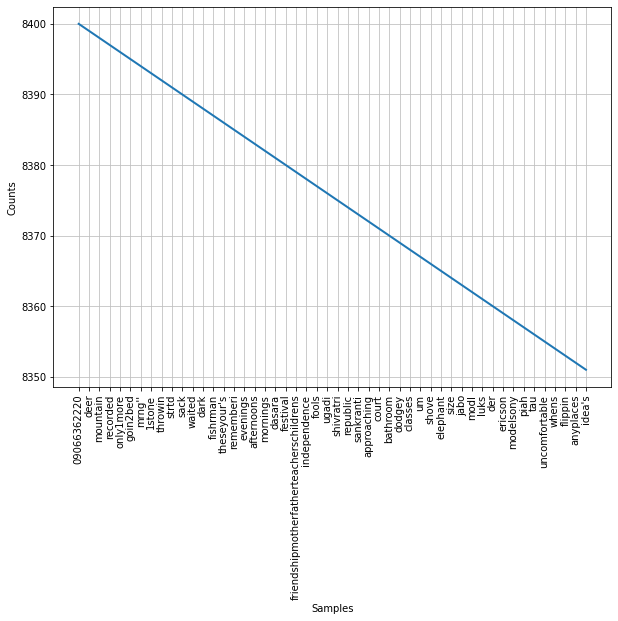

In [ ]:
frequency_dist = nltk.FreqDist(word_index)
plt.figure(figsize=(10,7))
frequency_dist.plot(50,cumulative=False)

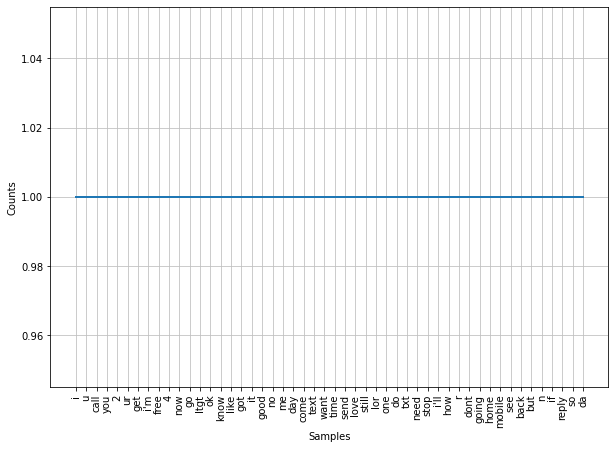

In [ ]:
frequency_dist = nltk.FreqDist(word_index.keys())
plt.figure(figsize=(10,7))
frequency_dist.plot(50,cumulative=False)

## 📝 Get MAX_SEQUENCE_LENGTH words in train , test.

In [ ]:
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH) # MAX_SEQUENCE_LENGTH frequent words on train.
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)   # MAX_SEQUENCE_LENGTH frequent words on test.

print(train_data.shape) 
print(test_data.shape)

train_labels = train['Target'] 
test_labels = test['Target']

(4457, 300)
(1115, 300)


In [ ]:
train_data.shape

(4457, 300)

## 📝 Character/Word transformation.
    * Convert character array to numeric array.
    * Changing data types.
    * Set EMBEDDING_DIM = 100.

In [ ]:
le = LabelEncoder() 
le.fit(train_labels)
train_labels = le.transform(train_labels) 
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True)) 
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3853,  604]))
(array([0, 1]), array([972, 143]))


In [ ]:
labels_train = to_categorical(np.asarray(train_labels)) 
labels_test = to_categorical(np.asarray(test_labels)) 

EMBEDDING_DIM = 100
print('Shape of data tensor:', train_data.shape) 
print('Shape of label tensor:', labels_train.shape) 
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (4457, 300)
Shape of label tensor: (4457, 2)
Shape of label tensor: (1115, 2)


# 👑 Train and Test 1d CNN model.

## 📀 Build and Start Training 1d CNN model.

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH ))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu')) 
model.add(MaxPooling1D(5)) 
model.add(Dropout(0.5)) 
model.add(BatchNormalization()) 
model.add(Conv1D(128, 5, activation='relu')) 
model.add(MaxPooling1D(5)) 
model.add(Dropout(0.5)) 
model.add(BatchNormalization()) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()
history = model.fit(train_data, labels_train, batch_size=64, epochs=5,validation_data=(test_data, labels_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 100)          2000000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 300, 100)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 296, 128)          64128     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 59, 128)           0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 59, 128)           0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 59, 128)           512       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 55, 128)         

## 📈 Visualize the Model Accuracy and Loss.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


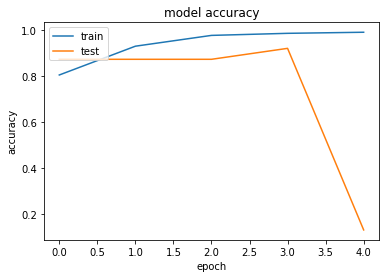

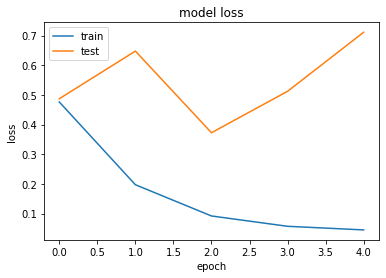

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💿 Predict the Test data by 1d CNN model.

In [ ]:
predicted=model.predict(test_data) 
#print(predicted)

precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision)) 
print('recall: {}'.format(recall))

print('fscore: {}'.format(fscore)) 
print('support: {}'.format(support))
print("\n####################### Performence Metrics ######################\n")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [1.         0.12859712]
recall: [0.00308642 1.        ]
fscore: [0.00615385 0.22788845]
support: [972 143]

####################### Performence Metrics ######################

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       972
           1       0.13      1.00      0.23       143

   micro avg       0.13      0.13      0.13      1115
   macro avg       0.56      0.50      0.12      1115
weighted avg       0.89      0.13      0.03      1115
 samples avg       0.13      0.13      0.13      1115



In [ ]:
#keras.metrics.confusion_matrix(y_test, y_pred)
'''
y_test = np.argmax(labels_test, axis=1)
y_test
y_pred = np.argmax(predicted, axis=1)
y_pred
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(predicted, axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
'''

'\ny_test = np.argmax(labels_test, axis=1)\ny_test\ny_pred = np.argmax(predicted, axis=1)\ny_pred\nfrom sklearn.metrics import confusion_matrix\ny_pred = np.argmax(predicted, axis=1)\nconf_mat = confusion_matrix(y_test, y_pred)\n'

# 👑 Train and Test RNN model.

## 📀 Build and Start Training simple RNN model.

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH ))
model.add(SimpleRNN(2, input_shape=(None,1))) 
model.add(Dense(2,activation='softmax')) 
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
history = model.fit(train_data, labels_train, batch_size=16, epochs=5,validation_data=(test_data, labels_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 100)          2000000   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 2)                 206       
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 6         
Total params: 2,000,212
Trainable params: 2,000,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
279/279 [==============================] - 20s 68ms/step - loss: 0.5641 - accuracy: 0.8805 - val_loss: 0.3414 - val_accuracy: 0.9812
Epoch 2/5
279/279 [==============================] - 18s 66ms/step - loss: 0.2973 - accuracy: 0.9863 - val_loss: 0.2122 - val_accuracy: 0.9857
Epoch 3/5
279/279 [==============================] - 18s 66ms/step - loss: 0.1788 - acc

## 📈 Visualize the Model Accuracy and Loss.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


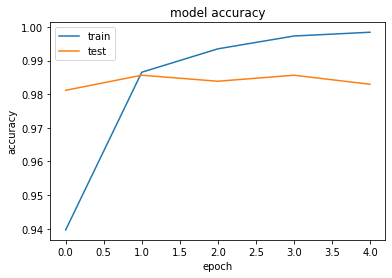

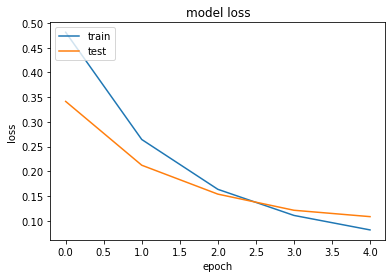

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💿 Predict the Test data by RNN model.

In [ ]:
predicted_Srnn=model.predict(test_data) 
#print(predicted_Srnn)
precision, recall, fscore, support = score(labels_test, predicted_Srnn.round())

print('precision: {}'.format(precision)) 
print('recall: {}'.format(recall)) 
print('fscore: {}'.format(fscore)) 
print('support: {}'.format(support))
print("\n####################### Performence Metrics ######################\n")
print(sklearn.metrics.classification_report(labels_test, predicted_Srnn.round()))

precision: [0.98672114 0.95588235]
recall: [0.99382716 0.90909091]
fscore: [0.9902614  0.93189964]
support: [972 143]

####################### Performence Metrics ######################

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.96      0.91      0.93       143

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115
 samples avg       0.98      0.98      0.98      1115



# 👑 Train and Test LSTM model.

## 📀 Build and Start Training LSTM model.

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(units = 16, activation='relu', recurrent_activation='hard_sigmoid', return_sequences=True ))
model.add(Dropout(0.2)) 
model.add(BatchNormalization())
model.add(Flatten()) 
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
history = model.fit(train_data, labels_train, batch_size=16, epochs=5,validation_data=(test_data, labels_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 100)          2000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 300, 16)           7488      
_________________________________________________________________
dropout_21 (Dropout)         (None, 300, 16)           0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 300, 16)           64        
_________________________________________________________________
flatten_8 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 9602      
Total params: 2,017,154
Trainable params: 2,017,122
Non-trainable params: 32
__________________________________________

## 📈 Visualize the Model Accuracy and Loss.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


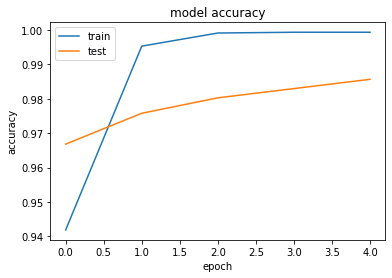

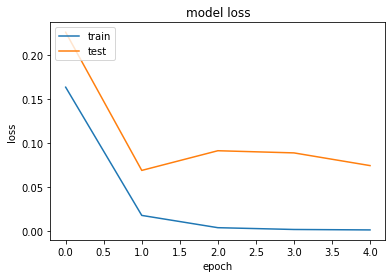

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💿 Predict the Test data by LSTM model.

In [ ]:
predicted_lstm=model.predict(test_data) 
#print(predicted_lstm)
precision, recall, fscore, support = score(labels_test, predicted_lstm.round())

print('precision: {}'.format(precision)) 
print('recall: {}'.format(recall)) 
print('fscore: {}'.format(fscore)) 
print('support: {}'.format(support))
print("\n####################### Performence Metrics ######################\n")
print(sklearn.metrics.classification_report(labels_test, predicted_lstm.round()))

precision: [0.98478702 0.99224806]
recall: [0.99897119 0.8951049 ]
fscore: [0.9918284  0.94117647]
support: [972 143]

####################### Performence Metrics ######################

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.99      0.90      0.94       143

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



# 👑 Train and Test Bidirectional LSTM model.

## 📀 Build and Start Training Bidirectional LSTM model.

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH ))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(Conv1D(16, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform"))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu")) 
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()
history = model.fit(train_data, labels_train, batch_size=16, epochs=3,validation_data=(test_data, labels_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 300, 100)          2000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300, 32)           14976     
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 298, 16)           1552      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                850       
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)               

## 📈 Visualize the Model Accuracy and Loss.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


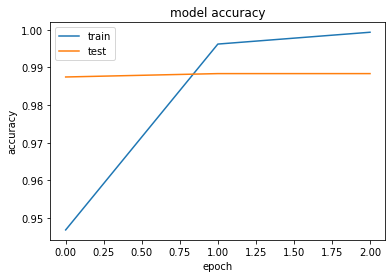

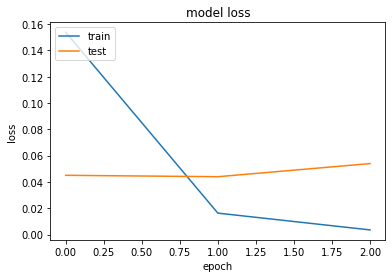

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💿 Predict the Test data by Bidirectional LSTM model.

In [ ]:
predicted_blstm=model.predict(test_data) 

precision, recall, fscore, support = score(labels_test, predicted_blstm.round())

print('precision: {}'.format(precision)) 
print('recall: {}'.format(recall)) 
print('fscore: {}'.format(fscore)) 
print('support: {}'.format(support))
print("\n####################### Performence Metrics ######################\n")
print(sklearn.metrics.classification_report(labels_test, predicted_blstm.round()))

precision: [0.98779247 0.99242424]
recall: [0.99897119 0.91608392]
fscore: [0.99335038 0.95272727]
support: [972 143]

####################### Performence Metrics ######################

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       972
           1       0.99      0.92      0.95       143

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115

